In [ ]:
!pip install cebra openpyxl --quiet
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import scipy.io
import cebra


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install cebra --quiet

In [ ]:
mat_file_path = "/content/drive/MyDrive/my_files_dyncl25/PainData_TH.mat"
excel_file_path = "/content/drive/MyDrive/my_files_dyncl25/ExcelTH.xlsx"

In [ ]:
# TH data
mat_contents = scipy.io.loadmat(mat_file_path)

def explore_mat_structure(mat_contents):
    print("Keys in the .mat file:")
    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    print(f"Data variables: {data_keys}")

    print("\nStructure of each variable:")
    for key in data_keys:
        value = mat_contents[key]
        print(f"\n{key}:")
        print(f"  Type: {type(value)}")
        print(f"  Shape: {value.shape if hasattr(value, 'shape') else 'N/A'}")
        print(f"  Data type: {value.dtype if hasattr(value, 'dtype') else 'N/A'}")

explore_mat_structure(mat_contents)


Keys in the .mat file:
Data variables: ['AMP', 'SLP', 'None', 'TEMP', 'aSLP', 'fmridata']

Structure of each variable:

AMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

SLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

None:
  Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
  Shape: (1,)
  Data type: [('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]

TEMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

aSLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 235600)
  Data type: float32

fmridata:
  Type: <class 'numpy.ndarray'>
  Shape: (408, 235600)
  Data type: float32


/usr/local/lib/python3.11/dist-packages/scipy/io/matlab/_mio.py:235: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Considerscipy.io.matlab.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [ ]:
# arrays
amp = mat_contents['AMP']
slp = mat_contents['SLP']
aslp = mat_contents['aSLP']
temp = mat_contents['TEMP']
fmridata = mat_contents['fmridata']

# transpose to (timepoints x features)
amp_df = pd.DataFrame(amp.T)
slp_df = pd.DataFrame(slp.T)
aslp_df = pd.DataFrame(aslp.T)
temp_df = pd.DataFrame(temp.T)
fmri_df = pd.DataFrame(fmridata.T)

In [ ]:
# subject-session mapping
subject_session_mapping = {
    'TH11': [1, 2, 3, 4], 'TH12': [1, 2, 3, 4], 'TH13': [1, 2, 3, 4],
    'TH16': [1, 2, 3, 4], 'TH17': [1, 2, 3, 4], 'TH18': [1, 2, 3, 4],
    'TH19': [1, 2, 3, 4], 'TH21': [1, 2, 3, 4], 'TH22': [1, 2, 3, 4],
    'TH23': [1, 2, 3, 4], 'TH24': [1, 2, 3, 4], 'TH25': [1, 2, 3, 4],
    'TH26': [1, 2, 3, 4], 'TH28': [1, 2, 3, 4], 'TH29': [1, 2, 3, 4],
    'TH30': [1, 2, 3, 4], 'TH32': [1, 2, 3, 4], 'TH33': [1, 2, 3, 4],
    'TH34': [1, 2, 3, 4], 'TH35': [1, 2, 3, 4], 'TH36': [1, 2, 3, 4],
    'TH37': [1, 2, 3, 4], 'TH38': [1, 2, 3, 4], 'TH39': [1, 2, 3, 4],
    'TH40': [1, 2, 3, 4], 'TH41': [1, 2, 3, 4], 'TH42': [1, 2, 3, 4],
    'TH43': [1, 2, 3, 4], 'TH44': [1, 2, 3, 4], 'TH45': [1, 2, 3, 4],
    'TH47': [1, 2, 3, 4], 'TH48': [1, 2, 3, 4], 'TH49': [1, 2, 3, 4],
    'TH51': [1, 2, 3, 4], 'TH52': [1, 2, 3, 4], 'TH53': [1, 2, 3, 4],
    'TH54': [1, 2, 3, 4], 'TH55': [1, 2, 3, 4]
}

# subject/session lists
subject_ids, session_ids = [], []
normal_session_length = 1550

for subj in subject_session_mapping:
    for sess in subject_session_mapping[subj]:
        subject_ids.extend([subj] * normal_session_length)
        session_ids.extend([sess] * normal_session_length)

subject_ids = np.array(subject_ids)
session_ids = np.array(session_ids)

# sanity check
assert len(subject_ids) == amp_df.shape[0], "Mismatch in subject array length"
assert len(session_ids) == amp_df.shape[0], "Mismatch in session array length"


In [ ]:
# concatenate everything
full_df_th = pd.concat([
    pd.DataFrame({'Subject': subject_ids, 'Session': session_ids}),
    amp_df.add_prefix('AMP_'),
    slp_df.add_prefix('SLP_'),
    aslp_df.add_prefix('aSLP_'),
    temp_df.add_prefix('TEMP_'),
    fmri_df.add_prefix('fMRI_')
], axis=1)

print(f"Final dataset shape: {full_df_th.shape}")
full_df_th.head()


Final dataset shape: (235600, 554)


,Subject,Session,AMP_0,AMP_1,AMP_2,AMP_3,AMP_4,AMP_5,AMP_6,AMP_7,...,fMRI_398,fMRI_399,fMRI_400,fMRI_401,fMRI_402,fMRI_403,fMRI_404,fMRI_405,fMRI_406,fMRI_407
0,TH11,1,6.993610,2.053460,2.113221,2.172781,2.232459,2.292254,2.352165,2.412190,...,3.784715,3.819272,2.317747,2.202151,5.154809,1.309017,4.023471,3.537160,-0.046095,3.533876
1,TH11,1,-7.574545,-7.508230,-7.441603,-7.374667,-7.307420,-7.239861,-7.171989,-7.103803,...,-5.342267,0.722615,-0.263290,-4.476810,-2.254851,-0.952807,-1.373069,0.777178,-0.511249,-2.715815
2,TH11,1,-9.371132,-9.323178,-9.275395,-9.227427,-9.179194,-9.130692,-9.081921,-9.032879,...,1.191749,0.479512,-0.271741,0.995241,0.676701,1.108607,-2.213445,1.548676,0.443638,4.003865
3,TH11,1,5.216937,5.225333,10.233780,10.242276,10.250602,10.258641,10.266724,10.275302,...,-1.567099,-1.889619,-3.856092,-1.557872,-6.241904,-1.268922,-1.787661,-1.496045,-2.469975,-4.410764
4,TH11,1,-4.193720,-4.130483,-4.067373,-4.004293,-3.941356,-3.878720,-3.816509,1.245831,...,5.664182,4.651070,3.387242,8.461038,-0.989317,2.191742,1.968199,5.234507,1.263642,1.946377


In [ ]:
# check Pain variables correctly
amp_cols = [col for col in full_df_th.columns if col.startswith('AMP_')]
slp_cols = [col for col in full_df_th.columns if col.startswith('SLP_')]
aslp_cols = [col for col in full_df_th.columns if col.startswith('aSLP_')]
temp_cols = [col for col in full_df_th.columns if col.startswith('TEMP_')]
fmri_cols = [col for col in full_df_th.columns if col.startswith('fMRI_')]

amp_check = np.allclose(amp.T, full_df_th[amp_cols].values)
slp_check = np.allclose(slp.T, full_df_th[slp_cols].values)
aslp_check = np.allclose(aslp.T, full_df_th[aslp_cols].values)
temp_check = np.allclose(temp.T, full_df_th[temp_cols].values)
fmri_check = np.allclose(fmridata.T, full_df_th[fmri_cols].values)

print(f"AMP match: {amp_check}")
print(f"SLP match: {slp_check}")
print(f"aSLP match: {aslp_check}")
print(f"TEMP match: {temp_check}")
print(f"fMRI match: {fmri_check}")

# check first 5 rows of original AMP (transposed)
print("First 5 rows, original AMP (transposed):")
amp_transposed = pd.DataFrame(amp.T)
print(amp_transposed.head())

# check first 5 rows of AMP from full_df_th
print("\nFirst 5 rows, AMP from full_df_th:")
amp_from_full = full_df_th.filter(like='AMP_')
print(amp_from_full.head())
amp_match = np.allclose(amp_transposed.values, amp_from_full.values)
print(f"\nDo the AMP values match? -> {amp_match}")


AMP match: True
SLP match: True
aSLP match: True
TEMP match: True
fMRI match: True
First 5 rows, original AMP (transposed):
         0         1          2          3          4          5          6   \
0  6.993610  2.053460   2.113221   2.172781   2.232459   2.292254   2.352165   
1 -7.574545 -7.508230  -7.441603  -7.374667  -7.307420  -7.239861  -7.171989   
2 -9.371132 -9.323178  -9.275395  -9.227427  -9.179194  -9.130692  -9.081921   
3  5.216937  5.225333  10.233780  10.242276  10.250602  10.258641  10.266724   
4 -4.193720 -4.130483  -4.067373  -4.004293  -3.941356  -3.878720  -3.816509   

          7          8          9   ...        26        27        28  \
0   2.412190   2.472330   2.532583  ... -1.417613 -1.354790 -1.291865   
1  -7.103803 -12.035304 -11.966488  ... -5.747669 -5.673048 -5.598097   
2  -9.032879  -8.983566  -8.933980  ... -3.056625 -3.002643 -2.948375   
3  10.275302  10.284039   5.293114  ...  2.120526  5.463358  5.472891   
4   1.245831   1.308335   1.37

Checking features range:

In [ ]:
# feature groups based on prefixes
feature_groups = ['AMP_', 'SLP_', 'aSLP_', 'TEMP_', 'fMRI_']
# loop through each group
for prefix in feature_groups:
    group_df = full_df_th.filter(like=prefix)

    min_vals = group_df.min().min()
    max_vals = group_df.max().max()

    print(f"{prefix[:-1]} range:")
    print(f"  Min: {min_vals:.4f}")
    print(f"  Max: {max_vals:.4f}\n")


AMP range:
  Min: -47.5162
  Max: 72.9559

SLP range:
  Min: -1.0066
  Max: 1.0066

aSLP range:
  Min: -0.0033
  Max: 1.0033

TEMP range:
  Min: -3.7870
  Max: 2.4841

fMRI range:
  Min: -3025.8567
  Max: 3442.4763



### Note on fMRI data range

Although the fMRI signal ranges from approximately **−3000 to +3400**, these are rare outliers:
- **~0.19%** of all values fall outside ±500.
- majority (>99.8%) lie within the visual range shown in raster plots.
- outliers stem from PCA-based parcellation and physiological/motion artifacts.

--> I'm applying z-score normalization per region to standardize all fMRI features before model training.


1. WITHOUT NORMALIZATION:

CEBRA Time Embedding on Concatenated Sessions

In [ ]:
import cebra
from cebra import CEBRA
import torch

# neural and reshape: [time, features]
X = full_df_th.filter(like='fMRI_').values.astype(np.float32)

# time labels
time_labels = np.arange(X.shape[0])

print(f"Brain shape: {X.shape}")
print(f"Time labels shape: {time_labels.shape}")

Brain shape: (235600, 408)
Time labels shape: (235600,)


pos: -0.7126 neg:  6.4667 total:  5.7540 temperature:  1.1200: 100%|██████████| 5000/5000 [01:16<00:00, 65.42it/s]


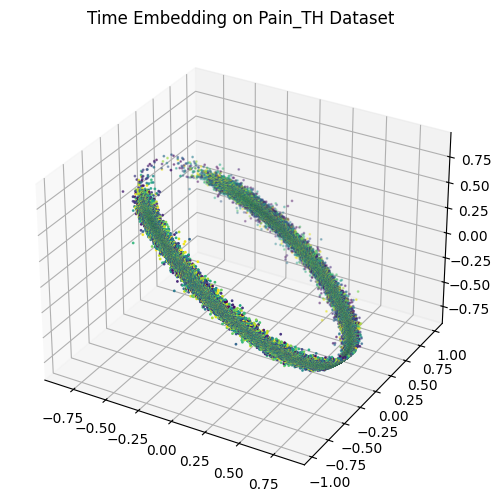

In [ ]:
# CEBRA model
cebra_time_model = CEBRA(
    model_architecture='offset10-model',
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=3,
    max_iterations=5000,
    distance='cosine',
    conditional='time',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

# fit the model on  full fMRI data
cebra_time_model.fit(X)
embedding = cebra_time_model.transform(X)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
           c=time_labels, cmap='viridis', s=1)
ax.set_title("Time Embedding on Pain_TH Dataset")
plt.show()

Dropping ROIs:

In [ ]:
brain_cols = [col for col in full_df_th.columns if col.startswith('fMRI_')]
cols_to_drop = [f'fMRI_{i}' for i in range(372, 380)]  # drop ROIs 373–380
brain_cols_final = [col for col in brain_cols if col not in cols_to_drop]

X_cut = full_df_th[brain_cols_final].values
print(f"Neural data shape after dropping ROIs 373-380: {X_cut.shape}")
y_cut = full_df_th['AMP_16'].values
print(f"Pain intensity label shape: {y_cut.shape}")

Neural data shape after dropping ROIs 373-380: (235600, 400)
Pain intensity label shape: (235600,)


pos: -0.6997 neg:  6.4751 total:  5.7754 temperature:  1.1200: 100%|██████████| 5000/5000 [01:11<00:00, 70.23it/s]


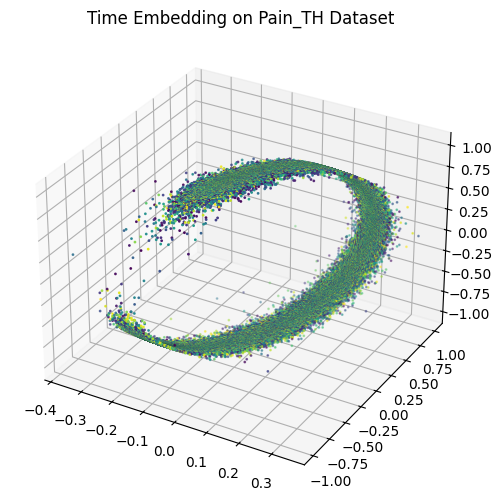

In [ ]:
# CEBRA model
cebra_time_model = CEBRA(
    model_architecture='offset10-model',
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=3,
    max_iterations=5000,
    distance='cosine',
    conditional='time',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

# fit the model on  full fMRI data
cebra_time_model.fit(X_cut)
cebra_time_model.save("cebra_time_model_painTH.pt")
embedding = cebra_time_model.transform(X_cut)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
           c=time_labels, cmap='viridis', s=1)
ax.set_title("Time Embedding on Pain_TH Dataset")
plt.show()


Now time_delta:

In [ ]:
import cebra
from cebra import CEBRA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = full_df_th.filter(like='fMRI_').values.astype(np.float32)
amp_0s = full_df_th["AMP_16"].values.astype(np.float32)
print("fMRI shape (X):", X.shape)
print("Behavior shape (AMP_16):", amp_0s.shape)


fMRI shape (X): (235600, 408)
Behavior shape (AMP_16): (235600,)


pos: -0.4360 neg:  6.6087 total:  6.1727 temperature:  1.1200: 100%|██████████| 5000/5000 [02:25<00:00, 34.36it/s]


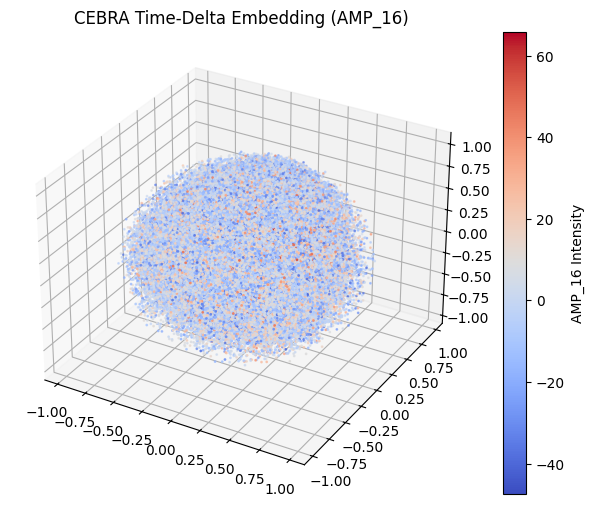

In [ ]:
# CEBRA model with behavioral conditioning
cebra_time_delta_model = CEBRA(
    model_architecture='offset10-model',
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=5000,
    distance='cosine',
    conditional='time_delta',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

cebra_time_delta_model.fit(X, amp_0s)
cebra_time_delta_model.save("cebra_time_delta_model_AMP16.pt")
embedding = cebra_time_delta_model.transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                     c=amp_0s, cmap='coolwarm', s=1)
ax.set_title("CEBRA Time-Delta Embedding (AMP_16)")
fig.colorbar(scatter, label="AMP_16 Intensity")
plt.show()


Dropping ROIs:

In [ ]:
import cebra
from cebra import CEBRA
import torch

# neural and reshape: [time, features]
X = full_df_th.filter(like='fMRI_').values.astype(np.float32)

time_labels = np.arange(X.shape[0])

print(f"Brain shape: {X.shape}")
print(f"Time labels shape: {time_labels.shape}")
brain_cols = [col for col in full_df_th.columns if col.startswith('fMRI_')] # dropping metadata,keeping only fmir
cols_to_drop = [f'fMRI_{i}' for i in range(372, 380)]  # drop ROIs 373–380
brain_cols_final = [col for col in brain_cols if col not in cols_to_drop]

X_cut = full_df_th[brain_cols_final].values
print(f"Neural data shape after dropping ROIs 373-380: {X_cut.shape}")
y_cut = full_df_th['AMP_16'].values
print(f"Pain intensity label shape: {y_cut.shape}")

Brain shape: (235600, 408)
Time labels shape: (235600,)
Neural data shape after dropping ROIs 373-380: (235600, 400)
Pain intensity label shape: (235600,)


pos: -0.4340 neg:  6.5875 total:  6.1534 temperature:  1.1200: 100%|██████████| 5000/5000 [02:26<00:00, 34.18it/s]


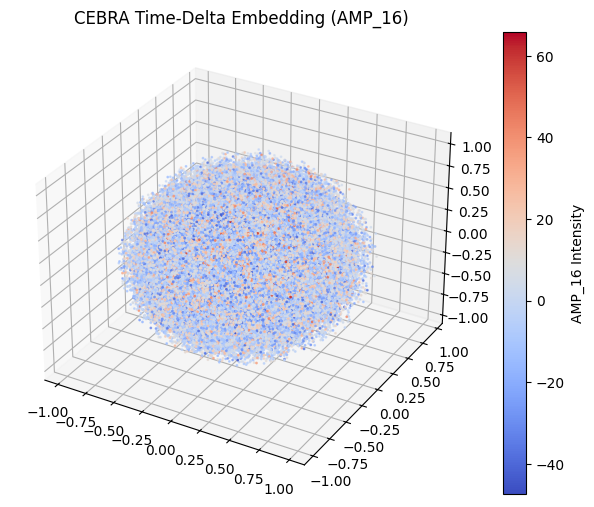

In [ ]:
# CEBRA model with behavioral conditioning
cebra_time_delta_model = CEBRA(
    model_architecture='offset10-model',
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=5000,
    distance='cosine',
    conditional='time_delta',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

# neural + behavioral signal
cebra_time_delta_model.fit(X_cut, amp_0s)
cebra_time_delta_model.save("cebra_time_delta_model_AMP16.pt")
embedding = cebra_time_delta_model.transform(X_cut)

# plots w/ with color by AMP intensity
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                     c=amp_0s, cmap='coolwarm', s=1)
ax.set_title("CEBRA Time-Delta Embedding (AMP_16)")
fig.colorbar(scatter, label="AMP_16 Intensity")
plt.show()


*time_delta* at +4s:

fMRI shape (X): (235600, 408)
Behavior shape (AMP_20): (235600,)


pos: -0.4550 neg:  6.6037 total:  6.1487 temperature:  1.1200: 100%|██████████| 5000/5000 [02:24<00:00, 34.61it/s]


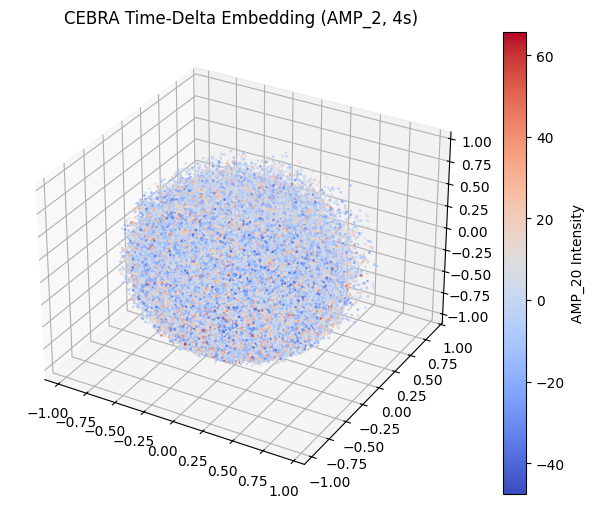

In [ ]:
import cebra
from cebra import CEBRA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# neural data: fMRI signals [235600 x 408]
X = full_df_th.filter(like='fMRI_').values.astype(np.float32)
amp_4s = full_df_th["AMP_20"].values.astype(np.float32)
print("fMRI shape (X):", X.shape)
print("Behavior shape (AMP_20):", amp_4s.shape)

cebra_time_delta_model_2 = CEBRA(
    model_architecture='offset10-model',
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=5000,
    distance='cosine',
    conditional='time_delta',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

cebra_time_delta_model_2.fit(X, amp_4s)

cebra_time_delta_model_2.save("cebra_time_delta_model_AMP20.pt")
embedding = cebra_time_delta_model_2.transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                     c=amp_0s, cmap='coolwarm', s=1)
ax.set_title("CEBRA Time-Delta Embedding (AMP_2, 4s)")
fig.colorbar(scatter, label="AMP_20 Intensity")
plt.show()

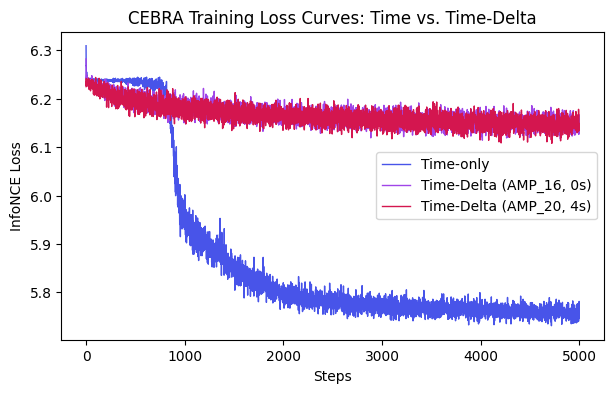

In [ ]:
import matplotlib.pyplot as plt

models = [cebra_time_model, cebra_time_delta_model, cebra_time_delta_model_2]
labels = ["Time-only", "Time-Delta (AMP_16, 0s)", "Time-Delta (AMP_20, 4s)"]
ax = cebra.compare_models(models, labels)
ax.set_title("CEBRA Training Loss Curves: Time vs. Time-Delta")
plt.show()


Trying different time offsets for the time_delta models (all 0s), BUT: 3 DIM:

In [ ]:
import cebra
from cebra import CEBRA
import numpy as np
import matplotlib.pyplot as plt

X = full_df_th.filter(like='fMRI_').values.astype(np.float32)
amp_0s = full_df_th["AMP_16"].values.astype(np.float32)
# different time offsets
time_offsets_list = [10, 20, 30, 40]
delta_models = []
delta_labels = []

for offset in time_offsets_list:
    print(f"\nTraining model with time_offsets = {offset}")

    model = CEBRA(
        model_architecture='offset10-model',
        batch_size=1024, #was 512
        learning_rate=1e-4,# was 3-e4
        temperature=1.12,
        output_dimension=3,
        max_iterations=4000,  # reduced for visualization
        distance='cosine',
        conditional='time_delta',
        device='cuda_if_available',
        verbose=True,
        time_offsets=offset
    )

    model.fit(X, amp_0s)
    model.save(f"cebra_time_delta_model_AMP16_offset{offset}.pt")

    delta_models.append(model)
    delta_labels.append(f"offset={offset}")


Training model with time_offsets = 10


pos: -0.5911 neg:  7.4700 total:  6.8789 temperature:  1.1200: 100%|██████████| 4000/4000 [03:38<00:00, 18.34it/s]



Training model with time_offsets = 20


pos: -0.5800 neg:  7.4694 total:  6.8894 temperature:  1.1200: 100%|██████████| 4000/4000 [03:38<00:00, 18.33it/s]



Training model with time_offsets = 30


pos: -0.6248 neg:  7.4968 total:  6.8720 temperature:  1.1200: 100%|██████████| 4000/4000 [03:38<00:00, 18.30it/s]



Training model with time_offsets = 40


pos: -0.5969 neg:  7.4576 total:  6.8608 temperature:  1.1200: 100%|██████████| 4000/4000 [03:38<00:00, 18.33it/s]


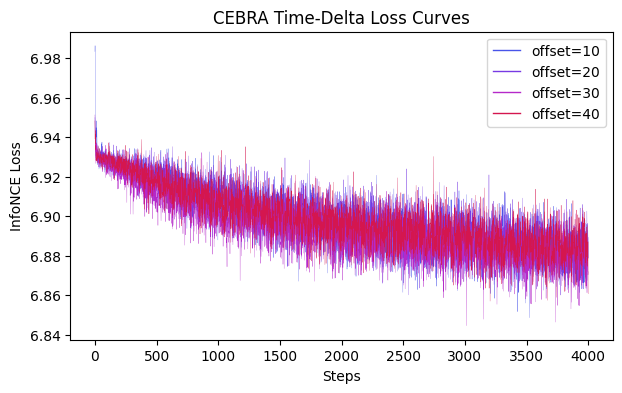

In [ ]:
ax = cebra.compare_models(delta_models, delta_labels)
ax.set_title("CEBRA Time-Delta Loss Curves")
for line in ax.lines:
    line.set_linewidth(0.2)  #  0.5 if needed

plt.show()

Trying only time offset 1 then 10 with higher output dimensions:

In [ ]:
cebra_time_delta_offset_1 = CEBRA(
    model_architecture='offset10-model',
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=4000,
    distance='cosine',
    conditional='time_delta',
    device='cuda_if_available',
    verbose=True,
    time_offsets=1
)

cebra_time_delta_offset_1.fit(X, amp_0s)
cebra_time_delta_offset_1.save("cebra_time_delta_offset_1, AMP16.pt")

pos: -0.5123 neg:  6.6795 total:  6.1672 temperature:  1.1200: 100%|██████████| 4000/4000 [01:55<00:00, 34.58it/s]


In [ ]:
cebra_time_delta_offset_10 = CEBRA(
    model_architecture='offset10-model',
    batch_size=512,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=4000,
    distance='cosine',
    conditional='time_delta',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

cebra_time_delta_offset_10.fit(X, amp_0s)
cebra_time_delta_offset_10.save("cebra_time_delta_offset_10, AMP!&.pt")

pos: -0.5102 neg:  6.6472 total:  6.1370 temperature:  1.1200: 100%|██████████| 4000/4000 [01:55<00:00, 34.63it/s]


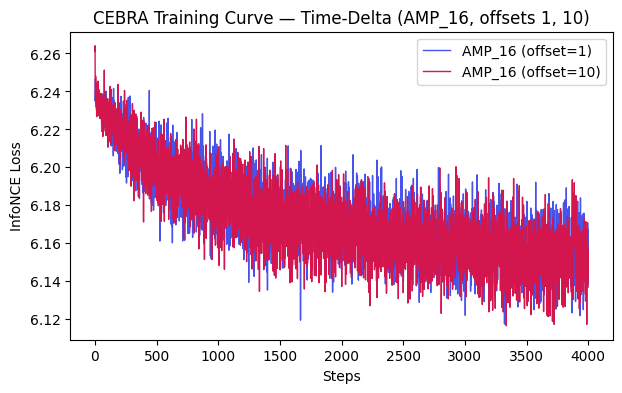

In [ ]:
import matplotlib.pyplot as plt

ax = cebra.compare_models([cebra_time_delta_offset_1, cebra_time_delta_offset_10], ["AMP_16 (offset=1)","AMP_16 (offset=10)"])
for line in ax.lines:
    line.set_linewidth(1.0)

ax.set_title("CEBRA Training Curve — Time-Delta (AMP_16, offsets 1, 10)")
plt.show()

WITH NORMALIZATION, time_delta first:

In [ ]:
from sklearn.preprocessing import StandardScaler

fmri_cols = [col for col in full_df_th.columns if col.startswith("fMRI_")]

scaler = StandardScaler()
fmri_scaled = scaler.fit_transform(full_df_th[fmri_cols].values)
full_df_th_z = full_df_th.copy()
full_df_th_z[fmri_cols] = fmri_scaled

X_z = full_df_th_z[fmri_cols].values.astype(np.float32)
amp_0s = full_df_th_z["AMP_16"].values.astype(np.float32)

pos: -0.4564 neg:  7.2996 total:  6.8431 temperature:  1.1200: 100%|██████████| 4000/4000 [03:39<00:00, 18.24it/s]


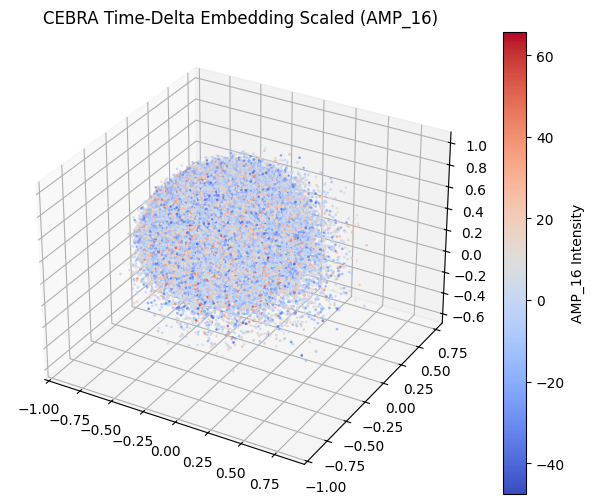

In [ ]:
cebra_time_delta_scaled = CEBRA(
    model_architecture='offset10-model',
    batch_size=1024,
    learning_rate=1e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=4000,
    distance='cosine',
    conditional='time_delta',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

cebra_time_delta_scaled.fit(X_z, amp_0s)
cebra_time_delta_scaled.save("cebra_time_delta_scaled, AMP16.pt")

embedding = cebra_time_delta_scaled.transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
                     c=amp_0s, cmap='coolwarm', s=1)
ax.set_title("CEBRA Time-Delta Embedding Scaled (AMP_16)")
fig.colorbar(scatter, label="AMP_16 Intensity")
plt.show()


pos: -0.7623 neg:  7.1142 total:  6.3519 temperature:  1.1200: 100%|██████████| 4000/4000 [01:34<00:00, 42.18it/s]


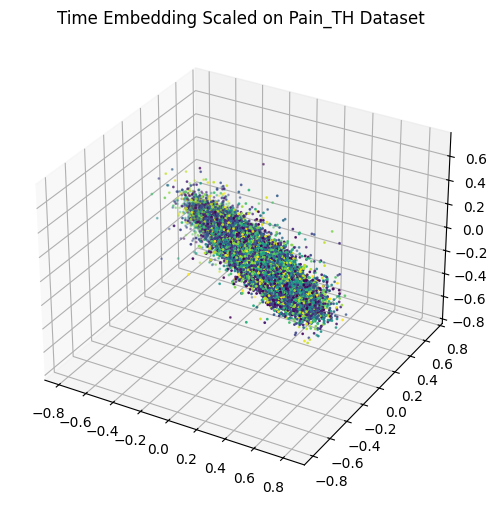

In [ ]:
cebra_time_model_scaled = CEBRA(
    model_architecture='offset10-model',
    batch_size=1024,
    learning_rate=1e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=4000,
    distance='cosine',
    conditional='time',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

cebra_time_model_scaled.fit(X_z)
cebra_time_model_scaled.save("cebra_time_model_painTH.pt")

embedding = cebra_time_model_scaled.transform(X_z)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
           c=time_labels, cmap='viridis', s=1)
ax.set_title("Time Embedding Scaled on Pain_TH Dataset")
plt.show()


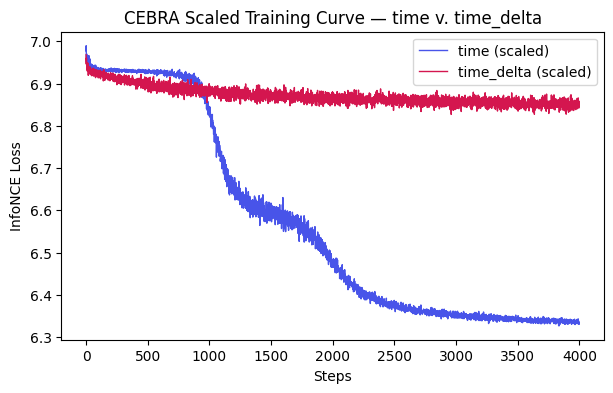

In [ ]:
import matplotlib.pyplot as plt

ax = cebra.compare_models([cebra_time_model_scaled, cebra_time_delta_scaled], ["time (scaled)","time_delta (scaled)"])

for line in ax.lines:
    line.set_linewidth(1.0)

ax.set_title("CEBRA Scaled Training Curve — time v. time_delta")
plt.show()

Using onlt time and unscaled data, all ROIs:

Brain shape: (235600, 408)
Time labels shape: (235600,)


pos: -0.7719 neg:  7.0612 total:  6.2893 temperature:  1.1200: 100%|██████████| 5000/5000 [01:55<00:00, 43.30it/s]


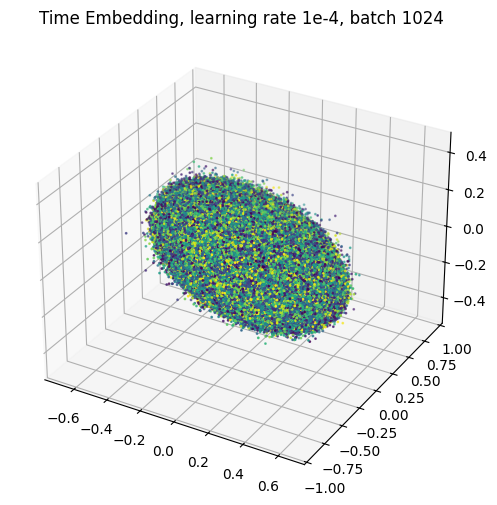

In [ ]:
import cebra
from cebra import CEBRA
import torch

# neural and reshape: [time, features]
X = full_df_th.filter(like='fMRI_').values.astype(np.float32)
time_labels = np.arange(X.shape[0])

print(f"Brain shape: {X.shape}")
print(f"Time labels shape: {time_labels.shape}")

# CEBRA model
cebra_time_model_2 = CEBRA(
    model_architecture='offset10-model',
    batch_size=1024,
    learning_rate=1e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=5000,
    distance='cosine',
    conditional='time',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

# fit the model on  full fMRI data
cebra_time_model_2.fit(X)
cebra_time_model_2.save("cebra_time_model_2.pt")
embedding = cebra_time_model_2.transform(X)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
           c=time_labels, cmap='viridis', s=1)
ax.set_title("Time Embedding, learning rate 1e-4, batch 1024")
plt.show()


In [ ]:
import cebra
from cebra import CEBRA
import torch

# neural and reshape: [time, features]
X = full_df_th.filter(like='fMRI_').values.astype(np.float32)
time_labels = np.arange(X.shape[0])

print(f"Brain shape: {X.shape}")
print(f"Time labels shape: {time_labels.shape}")

# CEBRA model
cebra_time_model_3 = CEBRA(
    model_architecture='offset10-model',
    batch_size=1024,
    learning_rate=3e-4,
    temperature=1.12,
    output_dimension=8,
    max_iterations=5000,
    distance='cosine',
    conditional='time',
    device='cuda_if_available',
    verbose=True,
    time_offsets=10
)

# fit the model on  full fMRI data
cebra_time_model_3.fit(X)
cebra_time_model_3.save("cebra_time_model_3.pt")
embedding = cebra_time_model_3.transform(X)

Brain shape: (235600, 408)
Time labels shape: (235600,)


pos: -0.8224 neg:  7.0674 total:  6.2450 temperature:  1.1200: 100%|██████████| 5000/5000 [01:54<00:00, 43.58it/s]


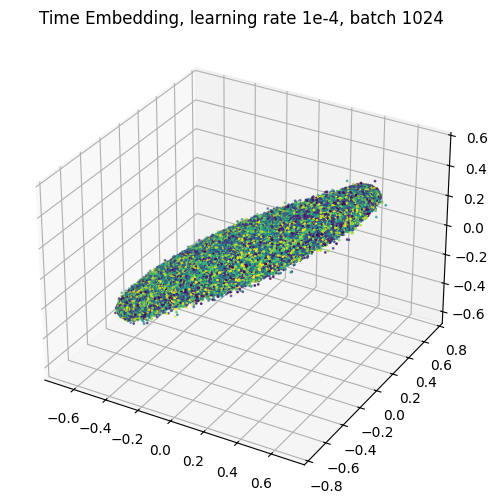

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2],
           c=time_labels, cmap='viridis', s=1)
ax.set_title("Time Embedding, learning rate 1e-4, batch 1024")
plt.show()

CBP Dataset

In [ ]:
import scipy.io
import numpy as np
import pandas as pd

file_path = "/content/PainDataChronicBackPain.mat"
mat_contents = scipy.io.loadmat(file_path)

def explore_mat_structure(mat_contents):
    print("Keys in the .mat file:")
    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    print(f"Data variables: {data_keys}")

    print("\nStructure of each variable:")
    for key in data_keys:
        value = mat_contents[key]
        print(f"\n{key}:")
        print(f"  Type: {type(value)}")
        print(f"  Shape: {value.shape if hasattr(value, 'shape') else 'N/A'}")
        print(f"  Data type: {value.dtype if hasattr(value, 'dtype') else 'N/A'}")

def convert_to_dataframe(array, var_name):
    if len(array.shape) == 2:
        df = pd.DataFrame(array)
        print(f"\nConverted {var_name} to DataFrame with shape {df.shape}")
        print(df.head())
        return df
    elif len(array.shape) == 1:
        df = pd.DataFrame(array, columns=[var_name])
        print(f"\nConverted {var_name} to DataFrame with shape {df.shape}")
        print(df.head())
        return df
    else:
        print(f"Cannot convert {var_name} with shape {array.shape} to DataFrame")
        return None

def run_mat_file_eda():
    explore_mat_structure(mat_contents)
    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]

    for key in data_keys:
        value = mat_contents[key]

        if isinstance(value, np.ndarray):
            _ = convert_to_dataframe(value, key)
        else:
            print(f"\n{key} is not a numpy array, skipping detailed analysis.")

if __name__ == "__main__":
    run_mat_file_eda()

def perform_eda(df, var_name):
    if df is None:
        return
    print(f"\nQuick Summary for {var_name}:")
    print("\nData Info:")
    print(df.info())
    print("\nQuantile Summary:")
    print(df.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
    total_missing = df.isnull().sum().sum() # missing values
    print(f"\nTotal Missing Values: {total_missing}")
    print("\nFirst 5 Rows:")
    print(df.head())

# Main
def run_mat_file_eda(_=None):
    mat_contents = scipy.io.loadmat(file_path)
    if mat_contents is None:
        return

    explore_mat_structure(mat_contents)

    data_keys = [key for key in mat_contents.keys() if not key.startswith('__')]
    for key in data_keys:
        value = mat_contents[key]

        if not isinstance(value, np.ndarray):
            print(f"\n{key} is not a numpy array, skipping detailed analysis.")
            continue

        df = convert_to_dataframe(value, key)
        if df is not None:
            perform_eda(df, key)
        else:
            print(f"\nCannot perform EDA on {key}. Shape: {value.shape}")
            try:
                if len(value.shape) <= 2:
                    print(value[:5])
                else:
                    print("Multidimensional array, showing first slice:")
                    print(value[0, :5, :5] if value.shape[1] > 5 and value.shape[2] > 5 else value[0])
            except:
                print("Cannot display sample data")

if __name__ == "__main__":
    run_mat_file_eda(file_path)

/usr/local/lib/python3.11/dist-packages/scipy/io/matlab/_mio.py:235: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Considerscipy.io.matlab.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Keys in the .mat file:
Data variables: ['AMP', 'SLP', 'None', 'aSLP', 'fmridata']

Structure of each variable:

AMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

SLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

None:
  Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
  Shape: (1,)
  Data type: [('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]

aSLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

fmridata:
  Type: <class 'numpy.ndarray'>
  Shape: (408, 74066)
  Data type: float32

Converted AMP to DataFrame with shape (36, 74066)
      0         1         2         3         4         5         6      \
0 -1.710360 -0.095602  0.732726  5.186329  1.725520  3.154810  5.377257   
1 -1.322127  1.101648 -0.033359  6.125499  1.734325  3.147894  5.383342   
2 -0.766725  2.176533 -0.899761  7.054698  1.743235  3.141104  5.386603   
3 -0.035631  3.147122 -1.726422  7.811177  1.752249  3.134442  

/usr/local/lib/python3.11/dist-packages/scipy/io/matlab/_mio.py:235: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Considerscipy.io.matlab.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


Keys in the .mat file:
Data variables: ['AMP', 'SLP', 'None', 'aSLP', 'fmridata']

Structure of each variable:

AMP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

SLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

None:
  Type: <class 'scipy.io.matlab._mio5_params.MatlabOpaque'>
  Shape: (1,)
  Data type: [('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]

aSLP:
  Type: <class 'numpy.ndarray'>
  Shape: (36, 74066)
  Data type: float32

fmridata:
  Type: <class 'numpy.ndarray'>
  Shape: (408, 74066)
  Data type: float32

Converted AMP to DataFrame with shape (36, 74066)
      0         1         2         3         4         5         6      \
0 -1.710360 -0.095602  0.732726  5.186329  1.725520  3.154810  5.377257   
1 -1.322127  1.101648 -0.033359  6.125499  1.734325  3.147894  5.383342   
2 -0.766725  2.176533 -0.899761  7.054698  1.743235  3.141104  5.386603   
3 -0.035631  3.147122 -1.726422  7.811177  1.752249  3.134442  

In [ ]:
import scipy.io
import numpy as np
import pandas as pd


amp = mat_contents['AMP']
slp = mat_contents['SLP']
aslp = mat_contents['aSLP']
fmridata = mat_contents['fmridata']

subject_session_mapping = {
    'R004': [1, 2, 3, 4],
    'R005': [2, 3, 4, 5],
    'R006': [1, 2, 3, 4],
    'R007': [1, 2, 3, 4],
    'R008': [1, 2, 3, 4],
    'R009': [1, 2, 4, 5],
    'R010': [1, 2, 3, 4],
    'R012': [1, 2, 3, 4],
    'R014': [1, 2, 3, 4],
    'R015': [1, 2, 3, 4],
    'R016': [2, 3, 4],   # Missing session 1
    'R017': [2, 3, 4, 5],
    'R018': [1, 2, 3, 4],
    'R019': [1, 2, 3, 4],
    'R020': [1, 2, 3, 4],
    'R021': [1, 2, 3, 4],
    'R022': [2, 3, 4],   # Missing session 1
    'R023': [1, 3, 4, 5],
    'R025': [1, 2, 3, 4],
    'R026': [1, 2, 3, 4]
}

subject_list = list(subject_session_mapping.keys())

subject_ids = []
session_ids = []
normal_session_length = 950
total_samples = fmridata.shape[1]  # 74066 samples

current_idx = 0

for subj in subject_list:
    sessions = subject_session_mapping[subj]
    for sess in sessions:
        if current_idx >= total_samples:
            break

        length = normal_session_length

        #  session may be shorter
        if current_idx + length > total_samples:
            length = total_samples - current_idx

        subject_ids.extend([subj] * length)
        session_ids.extend([sess] * length)

        current_idx += length

subject_ids = np.array(subject_ids)
session_ids = np.array(session_ids)

assert len(subject_ids) == total_samples, f"Subject array length mismatch: {len(subject_ids)}"
assert len(session_ids) == total_samples, f"Session array length mismatch: {len(session_ids)}"

amp_df = pd.DataFrame(amp.T)
slp_df = pd.DataFrame(slp.T)
aslp_df = pd.DataFrame(aslp.T)
fmri_df = pd.DataFrame(fmridata.T)

full_df = pd.concat([
    pd.DataFrame({'Subject': subject_ids, 'Session': session_ids}),
    amp_df.add_prefix('AMP_'),
    slp_df.add_prefix('SLP_'),
    aslp_df.add_prefix('aSLP_'),
    fmri_df.add_prefix('fMRI_')
], axis=1)

print(f"Final dataset shape: {full_df.shape}")
print(full_df.head())


Final dataset shape: (74066, 518)
  Subject  Session     AMP_0     AMP_1     AMP_2     AMP_3     AMP_4  \
0    R004        1 -1.710360 -1.322127 -0.766725 -0.035631  0.823763   
1    R004        1 -0.095602  1.101648  2.176533  3.147122  4.048497   
2    R004        1  0.732726 -0.033359 -0.899761 -1.726422 -2.360429   
3    R004        1  5.186329  6.125499  7.054698  7.811177  8.315646   
4    R004        1  1.725520  1.734325  1.743235  1.752249  1.761367   

      AMP_5     AMP_6     AMP_7  ...  fMRI_398  fMRI_399  fMRI_400  fMRI_401  \
0  1.686625  2.375102  2.758376  ...  3.367837  3.475237 -2.194928  1.877142   
1  4.787866  5.260774  5.519557  ...  8.823385  4.578340  3.760048  4.892106   
2 -2.756884 -3.045416 -3.400434  ...  7.847021  7.677726  0.044441  5.770524   
3  8.647096  8.915797  9.098438  ... -9.822039 -7.973587  0.798883 -3.720834   
4  1.770591  1.779921  1.789357  ... -5.840112 -1.918030 -0.026135 -4.360692   

    fMRI_402  fMRI_403  fMRI_404  fMRI_405  fMRI_406

In [ ]:
import numpy as np
import pandas as pd
import scipy.io

original_amp = amp
full_amp = full_df[[col for col in full_df.columns if col.startswith('AMP_')]].to_numpy()  #new amp
#  transpose og amp
original_amp_T = original_amp.T
are_same = np.allclose(original_amp_T, full_amp, atol=1e-6) # check if match
print(f"OG amp matches full amp? -> {are_same}")
print("\nFirst 5 rows, original AMP (transposed):")
print(pd.DataFrame(original_amp_T).head())
print("\nFirst 5 rows, new full_df AMP values:")
print(pd.DataFrame(full_amp).head())

if not are_same:
    print (":(")


OG amp matches full amp? -> True

First 5 rows, original AMP (transposed):
         0         1         2         3         4         5         6   \
0 -1.710360 -1.322127 -0.766725 -0.035631  0.823763  1.686625  2.375102   
1 -0.095602  1.101648  2.176533  3.147122  4.048497  4.787866  5.260774   
2  0.732726 -0.033359 -0.899761 -1.726422 -2.360429 -2.756884 -3.045416   
3  5.186329  6.125499  7.054698  7.811177  8.315646  8.647096  8.915797   
4  1.725520  1.734325  1.743235  1.752249  1.761367  1.770591  1.779921   

         7         8         9   ...        26        27        28        29  \
0  2.758376  2.867234  2.845914  ...  1.181838  2.011605  2.650153  2.968257   
1  5.519557  5.714704  5.901212  ... -4.365548 -4.064298 -3.580493 -2.846536   
2 -3.400434 -3.894857 -4.516159  ...  3.454453  3.948142  4.387644  4.783105   
3  9.098438  9.094168  8.848345  ...  3.341574  3.364915  3.386959  3.406140   
4  1.789357  1.798900  1.808550  ...  1.988134  1.999171  2.010181  2.0211

Time Setup:

Neural data shape after dropping ROIs 373-380: (74066, 400)
Pain intensity label shape: (74066,)
Using device: cuda


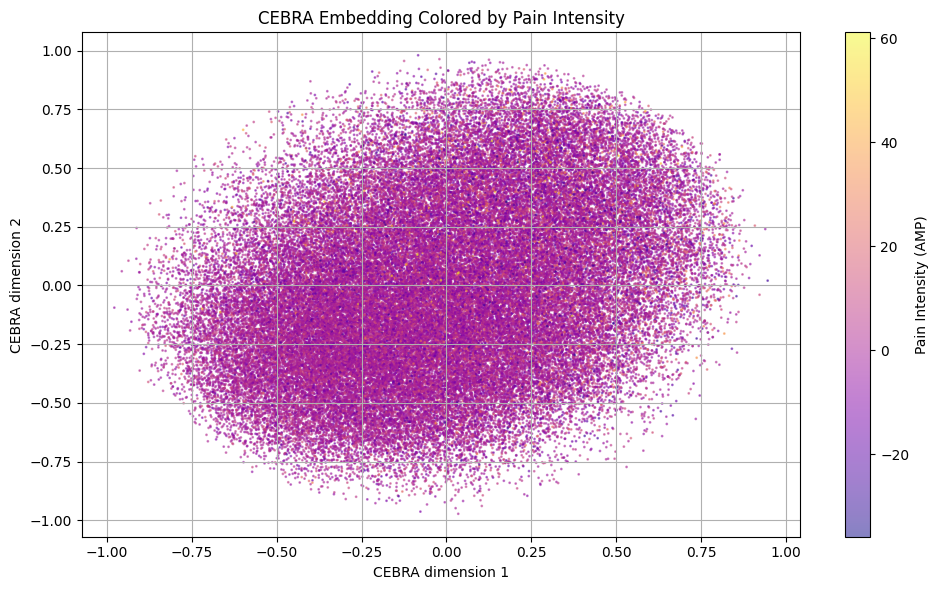


Decoding R² Scores:
  Ridge Regression: 0.0007
  kNN Regression: -0.0639


In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import torch
import cebra
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns

brain_cols = [col for col in full_df.columns if col.startswith('fMRI_')] # dropping metadata,keeping only fmir
cols_to_drop = [f'fMRI_{i}' for i in range(372, 380)]  # drop ROIs 373–38
brain_cols_final = [col for col in brain_cols if col not in cols_to_drop]

X_cbp = full_df[brain_cols_final].values
print(f"Neural data shape after dropping ROIs 373-380: {X_cbp.shape}")
y_cbp = full_df['AMP_16'].values
print(f"Pain intensity label shape: {y_cbp.shape}")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
cebra_model = cebra.CEBRA(
    model_architecture="offset10-model",
    batch_size=512,
    temperature=1.0,
    max_iterations=3000,
    learning_rate=3e-4,
    output_dimension=8,
    distance="cosine",
    conditional="time",
    device=device
)

cebra_model.fit(X_cbp, y_cbp)
embeddings = cebra_model.transform(X_cbp)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_cbp, cmap='plasma', s=1, alpha=0.5)
plt.colorbar(scatter, label="Pain Intensity (AMP)")
plt.title("CEBRA Embedding Colored by Pain Intensity")
plt.xlabel("CEBRA dimension 1")
plt.ylabel("CEBRA dimension 2")
plt.grid(True)
plt.tight_layout()
plt.show()

#decoding
X_train, X_test, y_train, y_test = train_test_split(embeddings, y_cbp, test_size=0.2, random_state=42)

# ridge linear
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# knn w k10 nonlinear
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nDecoding R² Scores:")
print(f"  Ridge Regression: {r2_ridge:.4f}")
print(f"  kNN Regression: {r2_knn:.4f}")

Behavioral Setup:

Neural data shape after dropping ROIs 373-380: (74066, 400)
Pain intensity label shape: (74066,)
Using device: cuda


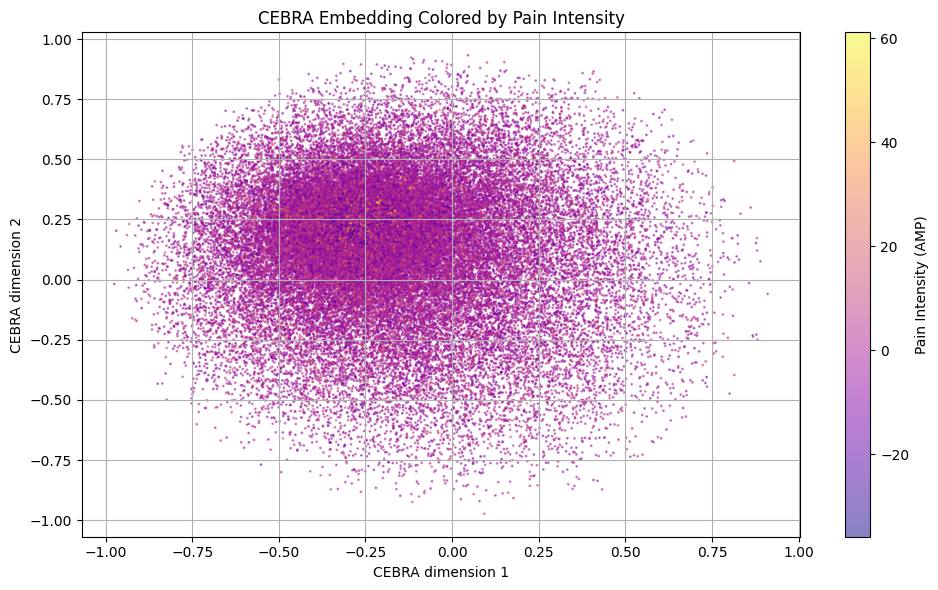


Decoding R² Scores:
  Ridge Regression: 0.0017
  kNN Regression: -0.0939


In [ ]:
import scipy.io
import pandas as pd
import numpy as np
import torch
import cebra
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import seaborn as sns

brain_cols = [col for col in full_df.columns if col.startswith('fMRI_')] # dropping metadata,keeping only fmir
cols_to_drop = [f'fMRI_{i}' for i in range(372, 380)]
brain_cols_final = [col for col in brain_cols if col not in cols_to_drop]

X_cbp = full_df[brain_cols_final].values
print(f"Neural data shape after dropping ROIs 373-380: {X_cbp.shape}")
y_cbp = full_df['AMP_16'].values
print(f"Pain intensity label shape: {y_cbp.shape}")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
cebra_model = cebra.CEBRA(
    model_architecture="offset10-model",
    batch_size=512,
    temperature=1.0,
    max_iterations=3000,
    learning_rate=3e-4,
    output_dimension=8,
    distance="cosine",
    conditional="time_delta",
    device=device
)

cebra_model.fit(X_cbp, y_cbp)
embeddings = cebra_model.transform(X_cbp)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings[:, 0], embeddings[:, 1], c=y_cbp, cmap='plasma', s=1, alpha=0.5)
plt.colorbar(scatter, label="Pain Intensity (AMP)")
plt.title("CEBRA Embedding Colored by Pain Intensity")
plt.xlabel("CEBRA dimension 1")
plt.ylabel("CEBRA dimension 2")
plt.grid(True)
plt.tight_layout()
plt.show()

#decoding
X_train, X_test, y_train, y_test = train_test_split(embeddings, y_cbp, test_size=0.2, random_state=42)

# ridge linear
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# knn w k10 nonlinear
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nDecoding R² Scores:")
print(f"  Ridge Regression: {r2_ridge:.4f}")
print(f"  kNN Regression: {r2_knn:.4f}")